In [177]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [200]:
#import csv and create dataframe 
cpi_data = pd.read_csv('../data/CPIData.txt')
cpi_data
#select rows bewtween specific dates 
cpi_data = cpi_data[(cpi_data["observation_date"] >= "2015-01-01") & (cpi_data["observation_date"] <= "2024-12-01")]
cpi_data

,observation_date,CPIAUCSL
816,2015-01-01,234.747
817,2015-02-01,235.342
818,2015-03-01,235.976
819,2015-04-01,236.222
820,2015-05-01,237.001
...,...,...
931,2024-08-01,314.131
932,2024-09-01,314.851
933,2024-10-01,315.564
934,2024-11-01,316.449


In [201]:
cpi_data["date"] = cpi_data["observation_date"].str[:7]

In [203]:
cpi_date_data = cpi_data.drop(columns = "observation_date")
cpi_date_data

,CPIAUCSL,date
816,234.747,2015-01
817,235.342,2015-02
818,235.976,2015-03
819,236.222,2015-04
820,237.001,2015-05
...,...,...
931,314.131,2024-08
932,314.851,2024-09
933,315.564,2024-10
934,316.449,2024-11


In [209]:
CPI_2024 = cpi_date_data.tail(12)
CPI_2024

,CPIAUCSL,date
924,309.794,2024-01
925,311.022,2024-02
926,312.107,2024-03
927,313.016,2024-04
928,313.140,2024-05
929,313.131,2024-06
930,313.566,2024-07
931,314.131,2024-08
932,314.851,2024-09
933,315.564,2024-10


In [215]:
CPI_2024["CPIAUCSL"].mean()

np.float64(313.69783333333334)

In [216]:
movie_df = pd.read_csv('../data/movies_2015_2024.csv')
movie_df.head(2)

,Unnamed: 0,Year,Data,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,genres,budget,revenue
0,0,2015,"{'adult': False, 'backdrop_path': '/kIBK5SKwgq...",False,/kIBK5SKwgqIIuRKhhWrJn3XkbPq.jpg,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,11.8411,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,2015-04-22,Avengers: Age of Ultron,False,7.271,23847,"['Action', 'Adventure', 'Science Fiction']",365000000,1405403694
1,1,2015,"{'adult': False, 'backdrop_path': '/gqrnQA6Xpp...",False,/gqrnQA6Xppdl8vIb2eJc58VC1tW.jpg,"[28, 12, 878]",76341,en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,10.6392,/hA2ple9q4qnwxp3hKVNhroipsir.jpg,2015-05-13,Mad Max: Fury Road,False,7.627,23503,"['Action', 'Adventure', 'Science Fiction']",150000000,378858340


What is the average profit margin (revenue - budget) across genres or years? (Try histograms or scatterplots for genres and line charts if you use years)

In [ ]:
movie_df["profit"] = movie_df["revenue"] - movie_df["budget"]

In [ ]:
movie_df.drop(columns= "avg_prof")
movie_df.head(2)

In [ ]:
# condense dataframe down to needed columns. Be sure to include unique identifiers (i.e. "id")
movie_df_cols = movie_df[["Year", "adult", "id", "release_date", "title", "vote_average", "vote_count", "genres", "budget", "revenue", "profit"]]
movie_df_cols = movie_df_cols.sort_values("release_date", ascending=True)
movie_df_cols

In [ ]:
movie_df_cols["date_released"] = movie_df_cols["release_date"].str[:7]
movie_df_cols

In [194]:
movie_df_cols = movie_df_cols.drop(columns = "release_date")
movie_df_cols

,Year,adult,id,title,vote_average,vote_count,genres,budget,revenue,profit,date_released
97,2015,False,201088,Blackhat,5.500,2117,"['Crime', 'Thriller', 'Action']",70000000,17752940,-52247060,2015-01
10,2015,False,264660,Ex Machina,7.570,13814,"['Drama', 'Science Fiction']",15000000,36869414,21869414,2015-01
78,2015,False,210860,Mortdecai,5.515,2701,"['Comedy', 'Adventure']",60000000,47318560,-12681440,2015-01
99,2015,False,241251,The Boy Next Door,4.918,2087,['Thriller'],4000000,52425855,48425855,2015-01
8,2015,False,207703,Kingsman: The Secret Service,7.600,17383,"['Crime', 'Comedy', 'Action', 'Adventure']",81000000,414351546,333351546,2015-01
...,...,...,...,...,...,...,...,...,...,...,...
961,2024,False,549509,The Brutalist,7.000,1393,"['Drama', 'History']",9600000,50145227,40545227,2024-12
915,2024,False,426063,Nosferatu,6.693,3227,"['Horror', 'Fantasy']",50000000,181764515,131764515,2024-12
974,2024,False,661539,A Complete Unknown,7.114,1247,"['Drama', 'Music']",65000000,138003641,73003641,2024-12
985,2024,False,1097549,Babygirl,5.729,999,"['Drama', 'Romance']",20000000,60934894,40934894,2024-12


In [205]:
movie_cpi_df = pd.merge(left=movie_df_cols,
         right=cpi_date_data,
         left_on="date_released",
         right_on="date",
         validate="m:1")
movie_cpi_df

,Year,adult,id,title,vote_average,vote_count,genres,budget,revenue,profit,date_released,CPIAUCSL,date
0,2015,False,201088,Blackhat,5.500,2117,"['Crime', 'Thriller', 'Action']",70000000,17752940,-52247060,2015-01,234.747,2015-01
1,2015,False,264660,Ex Machina,7.570,13814,"['Drama', 'Science Fiction']",15000000,36869414,21869414,2015-01,234.747,2015-01
2,2015,False,210860,Mortdecai,5.515,2701,"['Comedy', 'Adventure']",60000000,47318560,-12681440,2015-01,234.747,2015-01
3,2015,False,241251,The Boy Next Door,4.918,2087,['Thriller'],4000000,52425855,48425855,2015-01,234.747,2015-01
4,2015,False,207703,Kingsman: The Secret Service,7.600,17383,"['Crime', 'Comedy', 'Action', 'Adventure']",81000000,414351546,333351546,2015-01,234.747,2015-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024,False,549509,The Brutalist,7.000,1393,"['Drama', 'History']",9600000,50145227,40545227,2024-12,317.603,2024-12
996,2024,False,426063,Nosferatu,6.693,3227,"['Horror', 'Fantasy']",50000000,181764515,131764515,2024-12,317.603,2024-12
997,2024,False,661539,A Complete Unknown,7.114,1247,"['Drama', 'Music']",65000000,138003641,73003641,2024-12,317.603,2024-12
998,2024,False,1097549,Babygirl,5.729,999,"['Drama', 'Romance']",20000000,60934894,40934894,2024-12,317.603,2024-12


In [220]:
movie_CPI_df = movie_cpi_df.rename(columns={"date_released": "Movie_release_date", "CPIAUCSL": "CPI_Avg", "date": "CPI_date"})
movie_CPI_df.head()

,Year,adult,id,title,vote_average,vote_count,genres,budget,revenue,profit,Movie_release_date,CPI_Avg,CPI_date
0,2015,False,201088,Blackhat,5.500,2117,"['Crime', 'Thriller', 'Action']",70000000,17752940,-52247060,2015-01,234.747,2015-01
1,2015,False,264660,Ex Machina,7.570,13814,"['Drama', 'Science Fiction']",15000000,36869414,21869414,2015-01,234.747,2015-01
2,2015,False,210860,Mortdecai,5.515,2701,"['Comedy', 'Adventure']",60000000,47318560,-12681440,2015-01,234.747,2015-01
3,2015,False,241251,The Boy Next Door,4.918,2087,['Thriller'],4000000,52425855,48425855,2015-01,234.747,2015-01
4,2015,False,207703,Kingsman: The Secret Service,7.600,17383,"['Crime', 'Comedy', 'Action', 'Adventure']",81000000,414351546,333351546,2015-01,234.747,2015-01


In [219]:
CPI_Avg_2024 = movie_CPI_df.groupby("Year")["CPI_Avg"].mean().tail(1)
CPI_Avg_2024

Year
2024    313.89774
Name: CPI_Avg, dtype: float64

In [ ]:
# What we want to do: Adjust all financial metrics (budget,revenue, & Profit) for inflation to 2024 dollars using CPI data.
# How we want to do it: Define a function grabs the cpi data 2024 and multuplies it by the profit for each movie and divides it by the CPI data for that 
# year (and maybe month) to provide what the profit would be for that year in 2024 dollars 
# Question we want to answer: What is the most profitable year for movies? Have movies become more profitable or less profitable? 
# Plot that on histogram or bar chart to show how profit has been effected over the years 
# if there is enough time make it visually appealing by showing which movies have been the most profitable based on plot point size, color and opacity

In [244]:

def profit_2024_dollars(profit, CPI_Avg):
    return round(profit * CPI_Avg_2024.values[0] / CPI_Avg)

In [245]:
Adjusted_CPI_Dollars = []
for index, row in movie_CPI_df.iterrows(): 
    Adjusted_CPI_Dollars.append(profit_2024_dollars(row["profit"], row["CPI_Avg"]))

In [259]:
movie_CPI_df["Adjusted_CPI_Dollars"] = Adjusted_CPI_Dollars
movie_CPI_df["Adj_CPI_In_Mils"] = movie_CPI_df["Adjusted_CPI_Dollars"] / 1000000
movie_CPI_df.head(2)

,Year,adult,id,title,vote_average,vote_count,genres,budget,revenue,profit,Movie_release_date,CPI_Avg,CPI_date,Adjusted_CPI_Dollars,Adj_CPI_In_Mils
0,2015,False,201088,Blackhat,5.50,2117,"['Crime', 'Thriller', 'Action']",70000000,17752940,-52247060,2015-01,234.747,2015-01,-69863445,-69.863445
1,2015,False,264660,Ex Machina,7.57,13814,"['Drama', 'Science Fiction']",15000000,36869414,21869414,2015-01,234.747,2015-01,29243226,29.243226


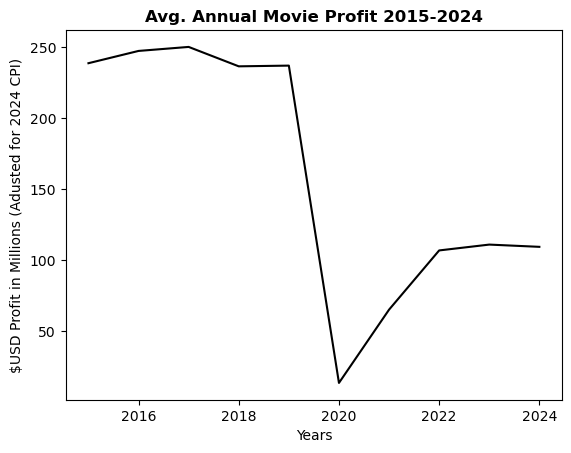

In [305]:
movie_CPI_df.groupby("Year")["Adj_CPI_In_Mils"].mean().plot(color="black");
plt.ylabel("$USD Profit in Millions (Adusted for 2024 CPI)");
plt.xlabel("Years")
plt.title("Avg. Annual Movie Profit 2015-2024", fontweight = "bold");
plt.savefig("line_average_annual_profit.png", dpi = 150)

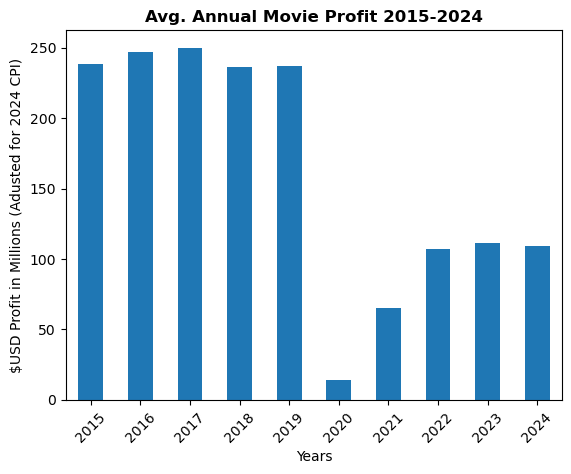

In [304]:
movie_CPI_df.groupby("Year")["Adj_CPI_In_Mils"].mean().plot(kind="bar");
plt.ylabel("$USD Profit in Millions (Adusted for 2024 CPI)")
plt.xlabel("Years")
plt.title("Avg. Annual Movie Profit 2015-2024", fontweight = "bold")
plt.xticks(rotation = 45);
plt.savefig("average_annual_profit.png", dpi = 150)

In [ ]:
# Adjust all financial metrics (budget and revenue) for inflation to 2024 dollars using CPI data.
# Deliverables: At least 3-4 clearly labeled visualizations (bar charts, scatter plots, or boxplots).


In [127]:
cpi_2008 = 212.174
cpi_2025 = 319.086

In [126]:
dollars_2008 = 100

In [128]:
dollars_2025 = dollars_2008 * cpi_2025 / cpi_2008
dollars_2025

150.3888318078558